2022-09-27

First attempt at reading file par32small_arctic_10km.msh

Note that this file was first opened with Gmsh and then exported (otherwise there was some encoding problems)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.tri import Triangulation
from matplotlib import cm, patches, collections

#from pynextsim import NextsimBin
#from pynextsim.nextsim_mesh import NextsimMesh
#from pynextsim.gmshlib import GmshMesh
%matplotlib notebook

In [3]:
import gmshparser
meshtxt = gmshparser.parse("/data/mb001/test.msh")
print(meshtxt)

Mesh name: /data/mb001/test.msh
Mesh version: 4.1
Number of nodes: 68005
Minimum node tag: 1
Maximum node tag: 68005
Number of node entities: 2529
Number of elements: 138873
Minimum element tag: 1
Maximum element tag: 138873
Number of element entities: 2529


### loop on the partition tag and get all nodes for each of the NPROC partitions

In [6]:
NPROC = 32
bignodes_x = np.zeros((NPROC,5000))
bignodes_y = np.zeros((NPROC,5000))
bigindices = np.zeros((NPROC,5000))

# loop on the partitions
for ip in range(0,NPROC):
    print('=== Partition: '+str(ip+1))
    for entity in meshtxt.get_node_entities():
        itag = ip+1
        if (entity.get_tag()==(ip+1)):
            it=-1
            # loop on the nodes of a given partition
            for node in entity.get_nodes():
                it = it+1
                nid = node.get_tag()
                bigindices[ip,it] = np.array([nid])
                ncoords = node.get_coordinates()
                bignodes_x[ip,it] = np.array(ncoords[0])
                bignodes_y[ip,it] = np.array(ncoords[1])
                #print("Node id = %s, node coordinates = %s" % (nid, ncoords))

=== Partition: 1
=== Partition: 2
=== Partition: 3
=== Partition: 4
=== Partition: 5
=== Partition: 6
=== Partition: 7
=== Partition: 8
=== Partition: 9
=== Partition: 10
=== Partition: 11
=== Partition: 12
=== Partition: 13
=== Partition: 14
=== Partition: 15
=== Partition: 16
=== Partition: 17
=== Partition: 18
=== Partition: 19
=== Partition: 20
=== Partition: 21
=== Partition: 22
=== Partition: 23
=== Partition: 24
=== Partition: 25
=== Partition: 26
=== Partition: 27
=== Partition: 28
=== Partition: 29
=== Partition: 30
=== Partition: 31
=== Partition: 32


<IPython.core.display.Javascript object>


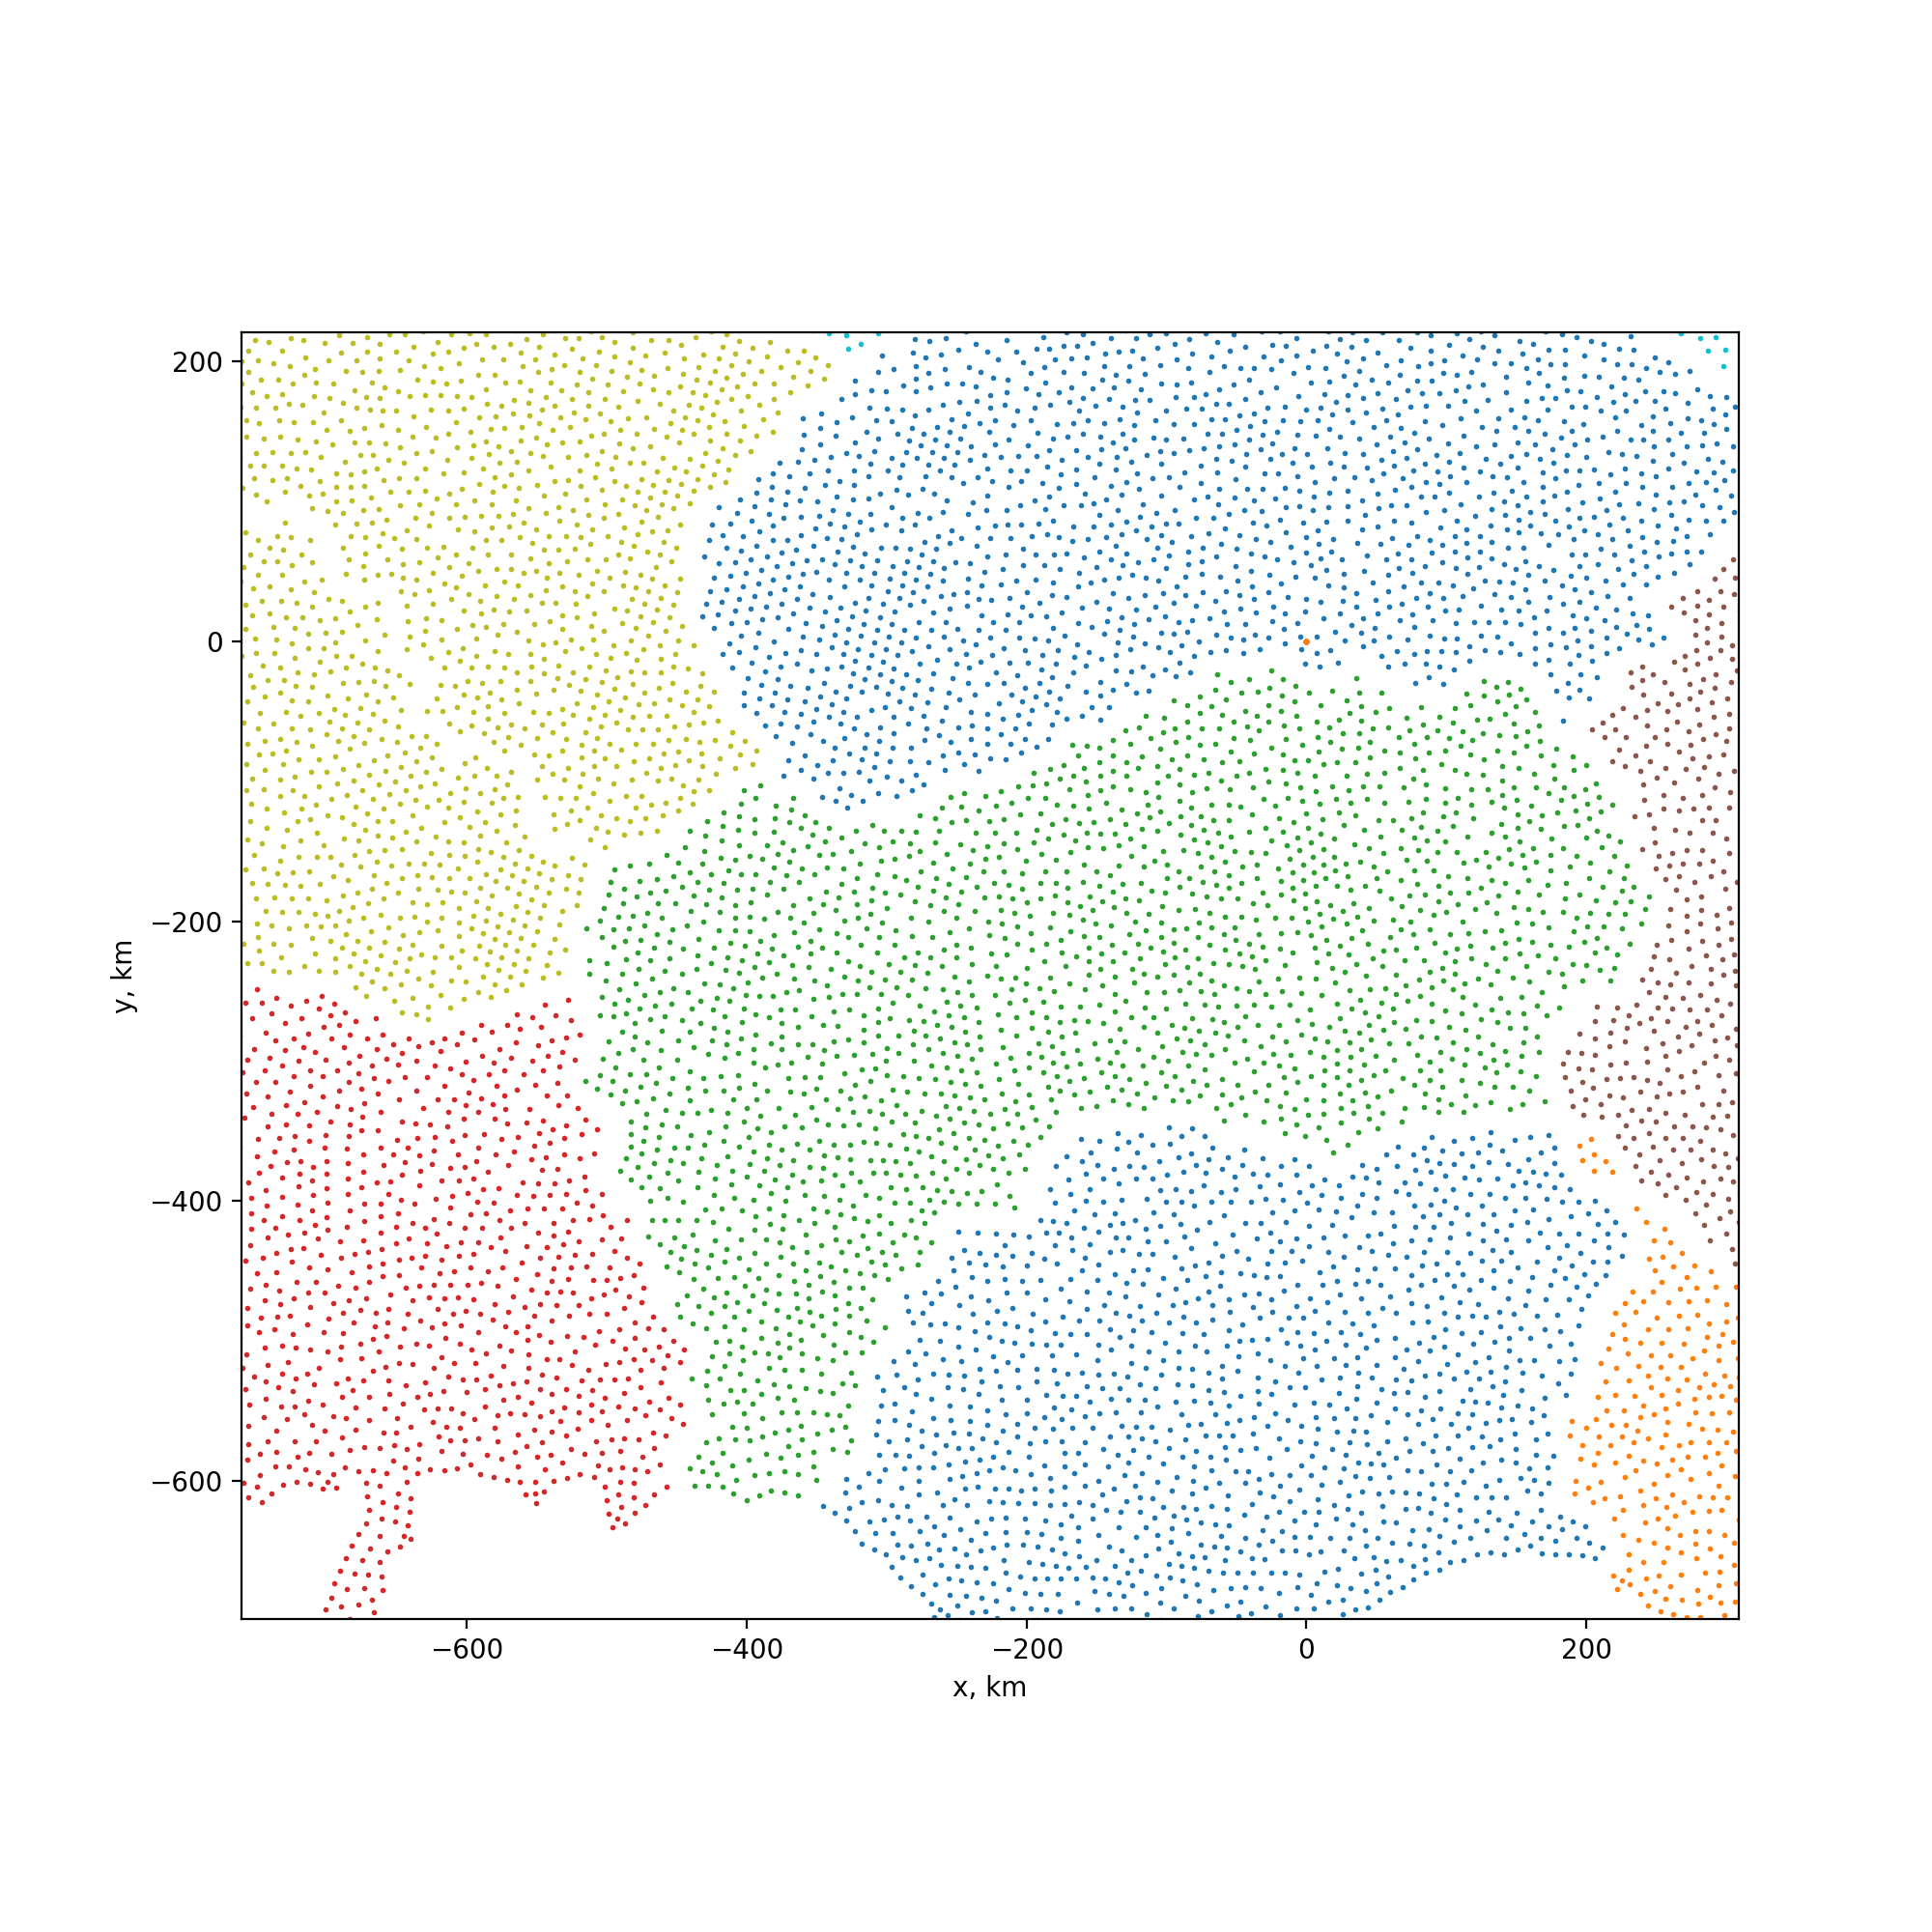

[]

In [7]:
ax = plt.figure(figsize=(10, 10)).add_subplot(111)
fig = ax.figure

sfac=1e-3
cmap='jet'




for ip in range(0,NPROC):
    plt.scatter(sfac*bignodes_x[ip,:].squeeze(), sfac*bignodes_y[ip,:].squeeze(),marker=".",s=4)

ax.set_aspect('equal')

ax.set_xlabel('x, km')
ax.set_ylabel('y, km')

#ax.set_xlim(-500,1500)
#ax.set_ylim(-1500,500)
ax.set_xlim(-2000,2000)
ax.set_ylim(-2000,2000)

#cbar  = fig.colorbar(pc, ax=ax, orientation="vertical", pad=0.01, shrink=0.5)

plt.plot()

### Autres elements à fouiller dans le fichier: 

Cf elementtypes on this page: https://gmsh.info/doc/texinfo/gmsh.html#MSH-file-format
        

In [7]:
for entity in meshtxt.get_element_entities():
    eltype = entity.get_element_type()
    print("Element type: %s" % eltype)
    if (eltype==1):
        for element in entity.get_elements():
            elid = element.get_tag()
            elcon = element.get_connectivity()
            print("Element id = %s, connectivity = %s" % (elid, elcon))

Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 15
Element type: 

Element id = 134108, connectivity = [50893, 66002]
Element type: 1
Element id = 131994, connectivity = [1536, 5424]
Element id = 131995, connectivity = [1568, 40695]
Element id = 132107, connectivity = [50203, 5424]
Element id = 132259, connectivity = [7625, 13097]
Element id = 132260, connectivity = [7625, 61109]
Element id = 132622, connectivity = [13097, 56979]
Element id = 132932, connectivity = [64382, 18780]
Element id = 132933, connectivity = [18780, 64621]
Element id = 133851, connectivity = [53941, 40695]
Element id = 133979, connectivity = [56979, 45126]
Element id = 133980, connectivity = [45126, 60764]
Element id = 134082, connectivity = [50203, 64621]
Element id = 134169, connectivity = [60764, 53941]
Element id = 134238, connectivity = [64382, 61109]
Element type: 1
Element id = 131996, connectivity = [1734, 48368]
Element id = 131997, connectivity = [48368, 1771]
Element type: 1
Element id = 132000, connectivity = [36698, 1847]
Element id = 132049, connectivity = [4408, 

In [8]:
for entity in meshtxt.get_node_entities():
    print("===")
    print(entity.get_tag())
    print(entity.get_number_of_nodes())

===
36
1
===
37
1
===
38
1
===
39
1
===
40
1
===
41
1
===
42
1
===
43
1
===
44
1
===
45
1
===
46
1
===
47
1
===
48
1
===
49
1
===
50
1
===
51
1
===
52
1
===
53
1
===
54
1
===
55
1
===
56
1
===
57
1
===
58
1
===
59
1
===
60
1
===
61
1
===
62
1
===
63
1
===
64
1
===
65
1
===
66
1
===
67
1
===
68
1
===
69
1
===
70
1
===
143
0
===
150
0
===
155
0
===
156
0
===
157
0
===
158
0
===
159
0
===
161
0
===
162
0
===
163
0
===
164
0
===
165
0
===
166
0
===
167
0
===
168
0
===
169
0
===
170
0
===
171
0
===
172
0
===
173
0
===
174
0
===
175
0
===
176
0
===
177
0
===
178
0
===
179
0
===
180
0
===
181
0
===
182
0
===
183
0
===
184
0
===
185
0
===
186
0
===
187
0
===
188
0
===
189
1
===
190
1
===
191
1
===
192
1
===
193
1
===
194
1
===
195
1
===
196
1
===
197
1
===
198
1
===
199
1
===
200
1
===
201
1
===
202
1
===
203
1
===
204
1
===
205
1
===
206
1
===
207
1
===
208
1
===
209
1
===
210
1
===
211
1
===
212
1
===
213
1
===
214
1
===
215
1
===
216
1
===
217
1
===
218
1
===
219
1
===
220
1
===
221
1
===
2

===
1595
1
===
1596
1
===
1597
1
===
1598
1
===
1599
1
===
1600
1
===
1601
1
===
1602
1
===
1603
1
===
1604
1
===
1605
1
===
1606
1
===
1607
1
===
1608
1
===
1609
1
===
1610
1
===
1611
1
===
1612
1
===
1613
1
===
1614
1
===
1615
1
===
1616
1
===
1617
1
===
1618
1
===
1619
1
===
1620
1
===
1621
1
===
1622
1
===
1623
1
===
1624
1
===
1625
1
===
1626
1
===
1627
1
===
1628
1
===
1629
1
===
1630
1
===
1631
1
===
1632
1
===
1633
1
===
1634
1
===
1635
1
===
1636
1
===
1637
1
===
1638
1
===
1639
1
===
1640
1
===
1641
1
===
1642
1
===
1643
1
===
1644
1
===
1645
1
===
1646
1
===
1647
1
===
1648
1
===
1649
1
===
1650
1
===
1651
1
===
1652
1
===
1653
1
===
1654
1
===
1655
1
===
1656
1
===
1657
1
===
1658
1
===
1659
1
===
1660
1
===
1661
1
===
1662
1
===
1663
1
===
1664
1
===
1665
1
===
1666
1
===
1667
1
===
1668
1
===
1669
1
===
1670
1
===
1671
1
===
1672
1
===
1673
1
===
1674
1
===
1675
1
===
1676
1
===
1677
1
===
1678
1
===
1679
1
===
1680
1
===
1681
1
===
1682
1
===
1683
1
===
1684
1
===
1685
1

In [9]:
entity.get_number_of_nodes()

2128